In [2]:
import datasets
import pandas as pd


data = datasets.load_dataset('7Xan7der7/us_airline_sentiment')
data


/home/epsilon/Desktop/folder_0/soutenance_1/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'name', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
        num_rows: 14640
    })
})

In [3]:
df = data['train'].to_pandas()
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(39)

In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [6]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,None,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,None,2/24/2015 11:35,None,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,None,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,None,2/24/2015 11:15,None,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,None,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,None,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,None,2/24/2015 11:15,None,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,None,2/24/2015 11:14,None,Pacific Time (US & Canada)


In [7]:
for col in df.columns:
    print(f'le pourcentage du feature : {col} est {df[col].count() / len(df) * 100}')

le pourcentage du feature : tweet_id est 100.0
le pourcentage du feature : airline_sentiment est 100.0
le pourcentage du feature : airline_sentiment_confidence est 100.0
le pourcentage du feature : negativereason est 62.714882542291626
le pourcentage du feature : negativereason_confidence est 71.91973152523799
le pourcentage du feature : airline est 100.0
le pourcentage du feature : name est 100.0
le pourcentage du feature : retweet_count est 100.0
le pourcentage du feature : text est 100.0
le pourcentage du feature : tweet_coord est 6.951578658995959
le pourcentage du feature : tweet_created est 100.0
le pourcentage du feature : tweet_location est 67.65974933223752
le pourcentage du feature : user_timezone est 67.04335319498665


In [8]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [9]:

cols_to_drop = [
    'tweet_id',
    'name',
    'tweet_coord',
    'tweet_created',
    'tweet_location',
    'user_timezone',
    'negativereason',             # leakage
    'negativereason_confidence',  # leakage
    'airline_sentiment_confidence' # leakage
]


df_cleaned = df.drop(columns=cols_to_drop)

df_cleaned.head(5)

,airline_sentiment,airline,retweet_count,text
0,neutral,Virgin America,0,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,0,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,0,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,0,@VirginAmerica and it's a really big bad thing...


In [10]:
df_cleaned.isna().sum()

airline_sentiment    0
airline              0
retweet_count        0
text                 0
dtype: int64

In [11]:
for value in df['airline_sentiment'].unique():
    print(f'le pourcentage du classe {value} est : {len(df[df['airline_sentiment'] == value]) / len(df) * 100}')

le pourcentage du classe neutral est : 21.16978289158277
le pourcentage du classe positive est : 16.115334566125608
le pourcentage du classe negative est : 62.714882542291626


<Axes: ylabel='count'>

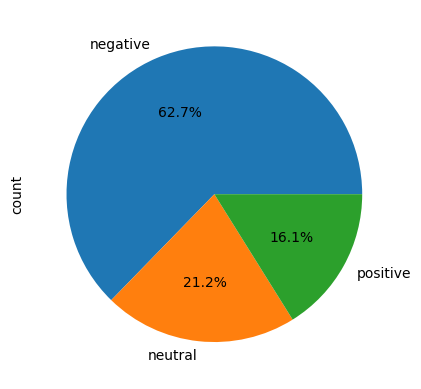

In [12]:
df['airline_sentiment'].value_counts().plot.pie(autopct='%1.1f%%')

In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
def remove_stop_words(text):
    arr = text.split()
    farr = [t for t in arr if t not in stop_words]
    new_text = " ".join(farr)
    return new_text

df_cleaned['processed_text'] = df_cleaned['text'].apply(remove_stop_words)

df_cleaned['processed_text']

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/epsilon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus added commercials experien...
2        @VirginAmerica I today... Must mean I need tak...
3        @VirginAmerica really aggressive blast obnoxio...
4                      @VirginAmerica really big bad thing
                               ...                        
14635     @AmericanAir thank got different flight Chicago.
14636    @AmericanAir leaving 20 minutes Late Flight. N...
14637    @AmericanAir Please bring American Airlines #B...
14638    @AmericanAir money, change flight, answer phon...
14639    @AmericanAir 8 ppl need 2 know many seats next...
Name: processed_text, Length: 14601, dtype: object

In [20]:
import re
def clean_text(text):
    text = str(text) 

    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df_cleaned['processed_text'] = df_cleaned['processed_text'].apply(clean_text)
df_cleaned['processed_text']

df_cleaned.to_csv('airline_centiment.csv')

In [ ]:

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2' , local_files_only=True)
embeddings = model.encode(df_cleaned['processed_text'].tolist(), show_progress_bar=True)

print(embeddings)

/home/epsilon/Desktop/folder_0/soutenance_1/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:827: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
Batches: 100%|██████████| 457/457 [00:05<00:00, 79.37it/s] 

[[-0.16261339  0.29089615 -0.03911699 ... -0.29191542  0.2922479
   0.02654561]
 [-0.0704566  -0.28783914  0.16805397 ... -0.676561    0.13310717
   0.19412442]
 [ 0.19095731 -0.07925105  0.29209206 ... -0.5846434  -0.29952615
  -0.35096675]
 ...
 [ 0.27930787 -0.27449358  0.10395818 ... -0.04337795 -0.01262571
   0.05879737]
 [-0.0090302   0.2596712  -0.20767502 ... -0.32940933 -0.46967715
  -0.01319089]
 [ 0.34801936 -0.10842501 -0.10464126 ...  0.07544705 -0.5751809
   0.21357666]]


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_cleaned['encoded_label'] = le.fit_transform(df_cleaned['airline_sentiment'])
df_cleaned

,airline_sentiment,airline,retweet_count,text,processed_text,encoded_label
0,neutral,Virgin America,0,@VirginAmerica What @dhepburn said.,virginamerica what dhepburn said,1
1,positive,Virgin America,0,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...,2
2,neutral,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,virginamerica i today must mean i need take an...,1
3,negative,Virgin America,0,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,0
4,negative,Virgin America,0,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,0
...,...,...,...,...,...,...
14635,positive,American,0,@AmericanAir thank you we got on a different f...,americanair thank got different flight chicago,2
14636,negative,American,0,@AmericanAir leaving over 20 minutes Late Flig...,americanair leaving minutes late flight no wa...,0
14637,neutral,American,0,@AmericanAir Please bring American Airlines to...,americanair please bring american airlines bla...,1
14638,negative,American,0,"@AmericanAir you have my money, you change my ...",americanair money change flight answer phones ...,0


In [29]:
import chromadb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(columns=['encoded_label']) 
client = chromadb.PersistentClient(path="./chromadb")

full_indices = np.arange(len(df_cleaned))

train_indices, test_indices = train_test_split(
    full_indices,
    test_size=0.2,
    random_state=42,
    stratify=df_cleaned['encoded_label']
)


train_ids_list = [str(i) for i in train_indices]
train_embeddings_list = embeddings[train_indices].tolist()
train_document_list = df_cleaned.iloc[train_indices]['processed_text'].tolist()
train_encoded_labels_list = df_cleaned.iloc[train_indices]['encoded_label'].tolist()
train_metadatas_list = [{'label': label} for label in train_encoded_labels_list]


test_ids_list = [str(i) for i in test_indices]
test_embeddings_list = embeddings[test_indices].tolist()
test_document_list = df_cleaned.iloc[test_indices]['processed_text'].tolist()
test_encoded_labels_list = df_cleaned.iloc[test_indices]['encoded_label'].tolist()
test_metadatas_list = [{'label': label} for label in test_encoded_labels_list]



def batch_insert(collection_name, ids_list, embeddings_list, document_list, metadatas_list, batch_size=5000):
    collection = client.get_or_create_collection(collection_name)
    total_data = len(ids_list)

    for i in range(0, total_data, batch_size):
        i_end = min(i + batch_size, total_data)

        collection.add(
            ids=ids_list[i:i_end],
            embeddings=embeddings_list[i:i_end],
            documents=document_list[i:i_end],
            metadatas=metadatas_list[i:i_end]
        )

In [ ]:
batch_insert(
    "sentiment_train",
    train_ids_list,
    train_embeddings_list,
    train_document_list,
    train_metadatas_list
)


batch_insert(
    "sentiment_test",
    test_ids_list,
    test_embeddings_list,
    test_document_list,
    test_metadatas_list
)

In [ ]:
train_collection = client.get_collection("sentiment_train")

train_data = train_collection.get()